In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_71013_R')

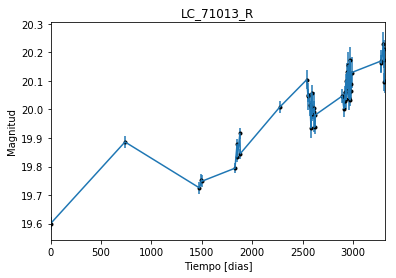

In [2]:
data = np.genfromtxt('LC_71013_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71013_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

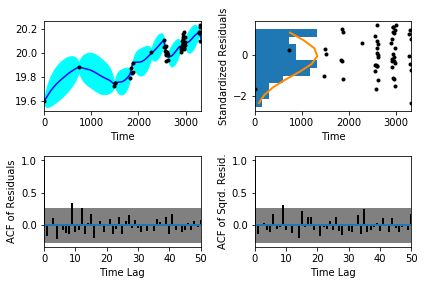

In [5]:
sample.assess_fit()

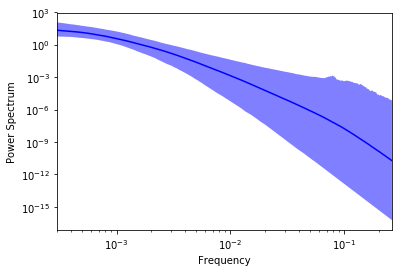

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_71013_R')

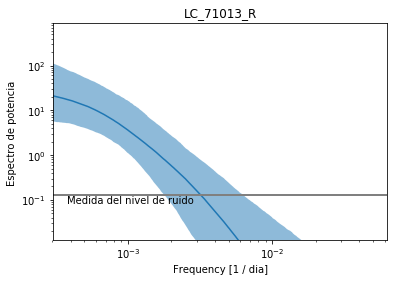

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71013_R')

Text(0.5,1,'Prediccion , valor esperado 71013_R')

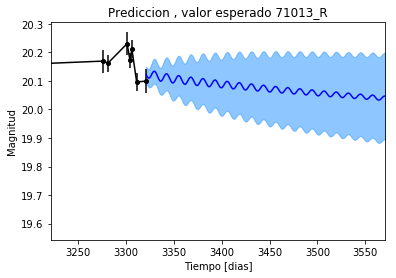

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 71013_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_71013_R')

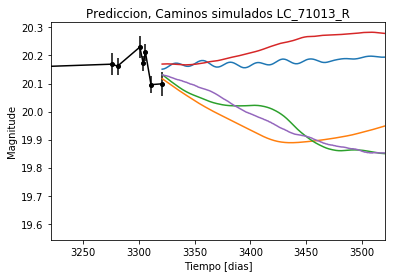

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_71013_R')

Text(0.5,1,'LC_71013_R')

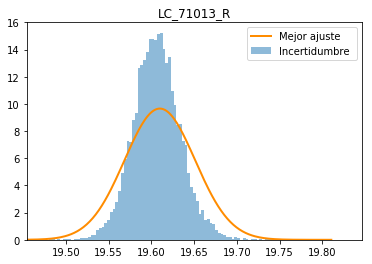

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71013_R')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_R')

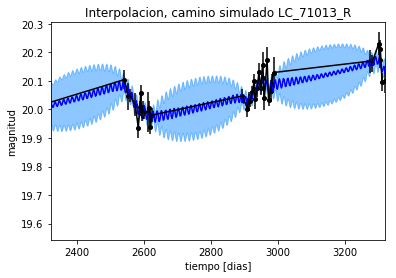

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_R')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_R')

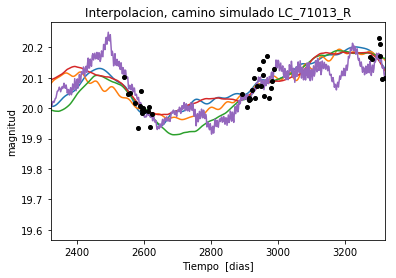

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 604.658334721
Median: 0.00809864532129
Standard deviation: 0.105528746678
68% credibility interval: [ 0.00080499  0.11595574]
95% credibility interval: [  3.43228811e-04   4.03892012e-01]
99% credibility interval: [  3.10775104e-04   4.94371382e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 758.118037612
Median: 0.00117097363504
Standard deviation: 0.0451594245457
68% credibility interval: [ 0.00040551  0.01548961]
95% credibility interval: [ 0.00031429  0.13489891]
99% credibility interval: [  3.03248858e-04   3.61881316e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 857.384668775
Median: 0.0111916460276
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1205.84537815
Median: 97.3912607025
Standard deviation: 1.64434241047
68% credibility interval: [ 95.68385485  98.51503056]
95% credibility interval: [ 93.26905335  99.81727906]
99% credibility interval: [  90.99879529  101.13648742]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1154.80685675
Median: 0.42040853078
Standard deviation: 1.13435447807
68% credibility interval: [ 0.04694181  2.12972922]
95% credibility interval: [ 0.01379827  3.88069496]
99% credibility interval: [ 0.00973764  5.09136414]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 852.23646002
Median: 0.163537721759
Standard deviation: 2.1573439475
68% credibility interval: [ 0.00808281  2.10071718]
95% credibility interval: [  5.43149545e-04  

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2621.16167156
Median: 7.62592033568e-22
Standard deviation: 2.10711031758e+97
68% credibility interval: [  1.69383843e-45   2.37247761e-03]
95% credibility interval: [  8.86097310e-70   1.32610906e+02]
99% credibility interval: [  1.74738168e-82   4.71697750e+85]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2722.63933701
Median: 19.8841755666
Standard deviation: 0.108330974335
68% credibility interval: [ 19.78901026  19.97696688]
95% credibility interval: [ 19.65370341  20.09122853]
99% credibility interval: [ 19.55063731  20.20942474]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 266.898379322
Median: 0.00104972815531
Standard deviation: 0.119072304251
68% credibility interval: [ 0.          0.16577506]
95% credibility interval: [ 0.          0.43889173]
99% credibility interval: [ 0.          0.50857914]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 266.898379322
Median: 0.00104972815531
Standard deviation: 0.119072304251
68% credibility interval: [ 0.          0.16577506]
95% credibility interval: [ 0.          0.43889173]
99% credibility interval: [ 0.          0.50857914]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 858.594301748
Median: 0.0
Standard deviation: 0.00027922933708
68% c

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1205.84537815
Median: 97.3912607025
Standard deviation: 1.64434241047
68% credibility interval: [ 95.68385485  98.51503056]
95% credibility interval: [ 93.26905335  99.81727906]
99% credibility interval: [  90.99879529  101.13648742]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2190.0864651
Median: 0.0371626070996
Standard deviation: 0.0488262306
68% credibility interval: [ 0.02113193  0.07394421]
95% credibility interval: [ 0.01331916  0.16814474]
99% credibility interval: [ 0.0108204   0.32291095]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1044.73455279
Median: 1.27947221506
Standard deviation: 0.211228850136
68% credibility interval: [ 1.08887601  1.50269749]
95% credibility interval: [ 0.9102727   1.73765694]
99% credibility interval: [ 0.77888165  1.90633149]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 565.877829056
Median: 2.88989845885e-05
Standard deviation: 0.0120433906513
68% credibility interval: [  7.39121565e-07   6.77141455e-04]
95% credibility interval: [  1.30090086e-08   1.29905313e-02]
99% credibility interval: [  4.90230993e-92   6.47871214e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 604.658334721
Median: (-0.0508852892908-0.457960281527j)
Standard deviation: 0.999688745256
68% credibility interval: [-0.72857143-0.66774761j -0.00505793-0.28847669j]
95% credibility interval: [ -2.53772835e+00+0.j          -2.15657022e-03-0.07346062j]
99% credibility interval: [ -3.10622700e+00-1.78464579j  -1.95265756e-03-0.642356j  ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 758.118037612
Median: (-0.00735744433878+3.10084708373j)
Standard deviation: 0.800152911999
68% credibility interval: [-0.09732409+0.47176411j -0.00254787+0.j        ]
95% credibility interval: [-0.84759483+0.28452361j -0.00197477+0.j        ]
99% credibility interval: [ -2.27376737e+00+1.2598766j  -1.90536877e-03+0.j       ]
Posterior su